# Stationarity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('F:\Skillenable\Data frames\Amazon_revenue_profit.csv')
df.head()

,Quarter,Revenue,Net Income
0,3/31/2020,75452,2535
1,12/31/2019,87437,3268
2,9/30/2019,69981,2134
3,6/30/2019,63404,2625
4,3/31/2019,59700,3561


In [3]:
df.shape

(61, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Quarter     61 non-null     object
 1   Revenue     61 non-null     int64 
 2   Net Income  61 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


In [5]:
# managing object variable (converting object data type into datetype)

def parse(x):
    return datetime.strftime(x, '%m%d%Y')

In [6]:
df = pd.read_csv('F:\Skillenable\Data frames\Amazon_revenue_profit.csv',
                parse_dates=['Quarter'], keep_date_col= False)
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Quarter     61 non-null     datetime64[ns]
 1   Revenue     61 non-null     int64         
 2   Net Income  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB


In [8]:
## descriptive statistics
df.describe()

,Revenue,Net Income
count,61.000000,61.000000
mean,22856.475410,566.311475
std,22210.760061,962.146914
min,1753.000000,-437.000000
25%,4889.000000,79.000000
50%,15704.000000,191.000000
75%,32714.000000,415.000000
max,87437.000000,3561.000000


In [9]:
#set index
df.set_index('Quarter', inplace=True)

In [10]:
df.head()

,Revenue,Net Income
Quarter,,
2020-03-31,75452,2535
2019-12-31,87437,3268
2019-09-30,69981,2134
2019-06-30,63404,2625
2019-03-31,59700,3561


# Detecting stationarity

## 1. Visualisation

### 1.a) Time Series plot

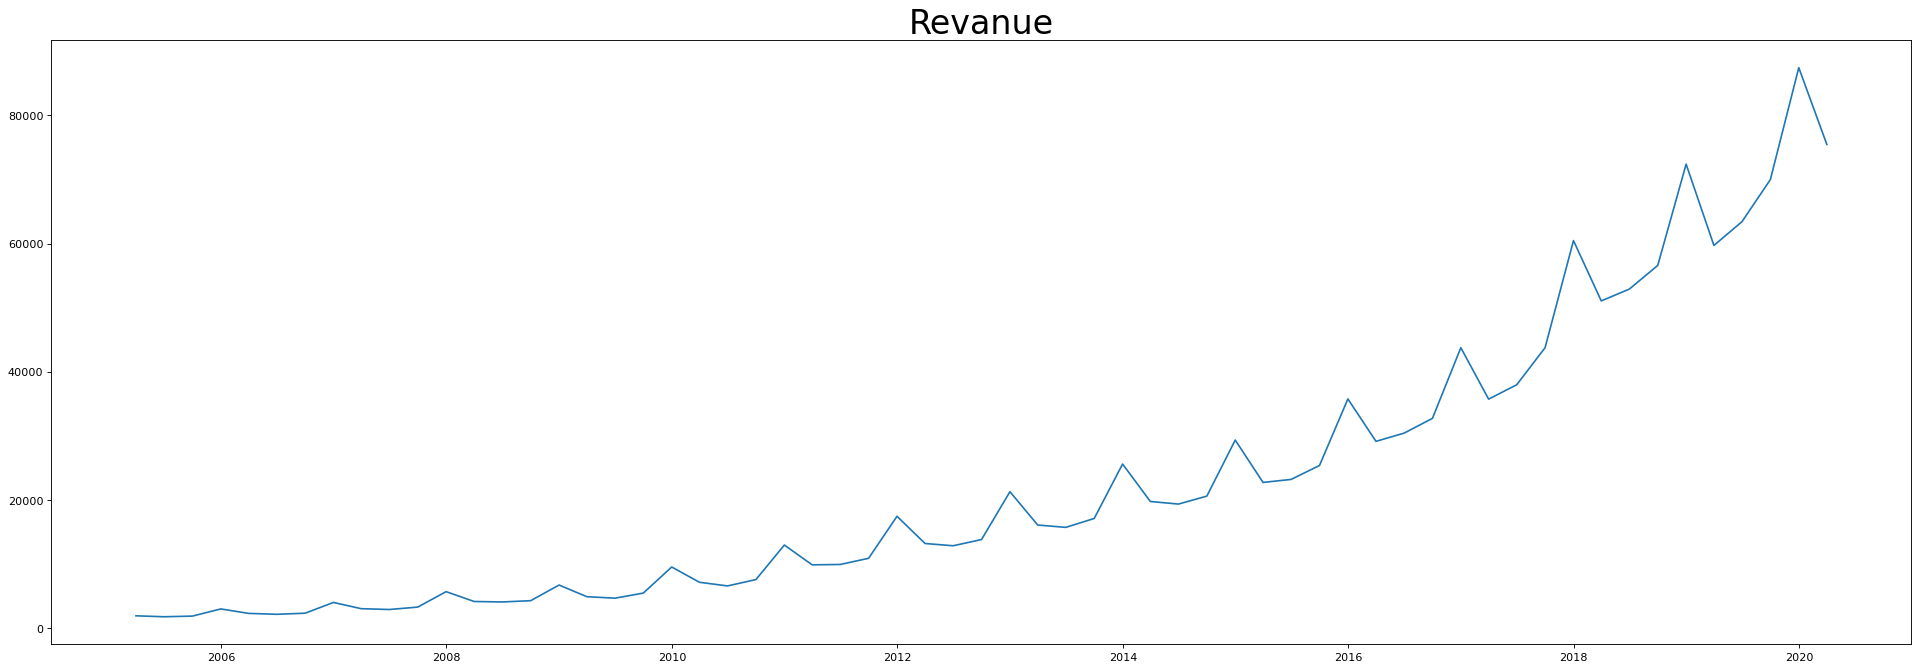

In [11]:
# For Revanue column

plt.figure(num = None, figsize=(30,10), dpi= 80, facecolor='w', edgecolor = 'k')
plt.title('Revanue', fontsize = 30)
plt.plot(df.Revenue)

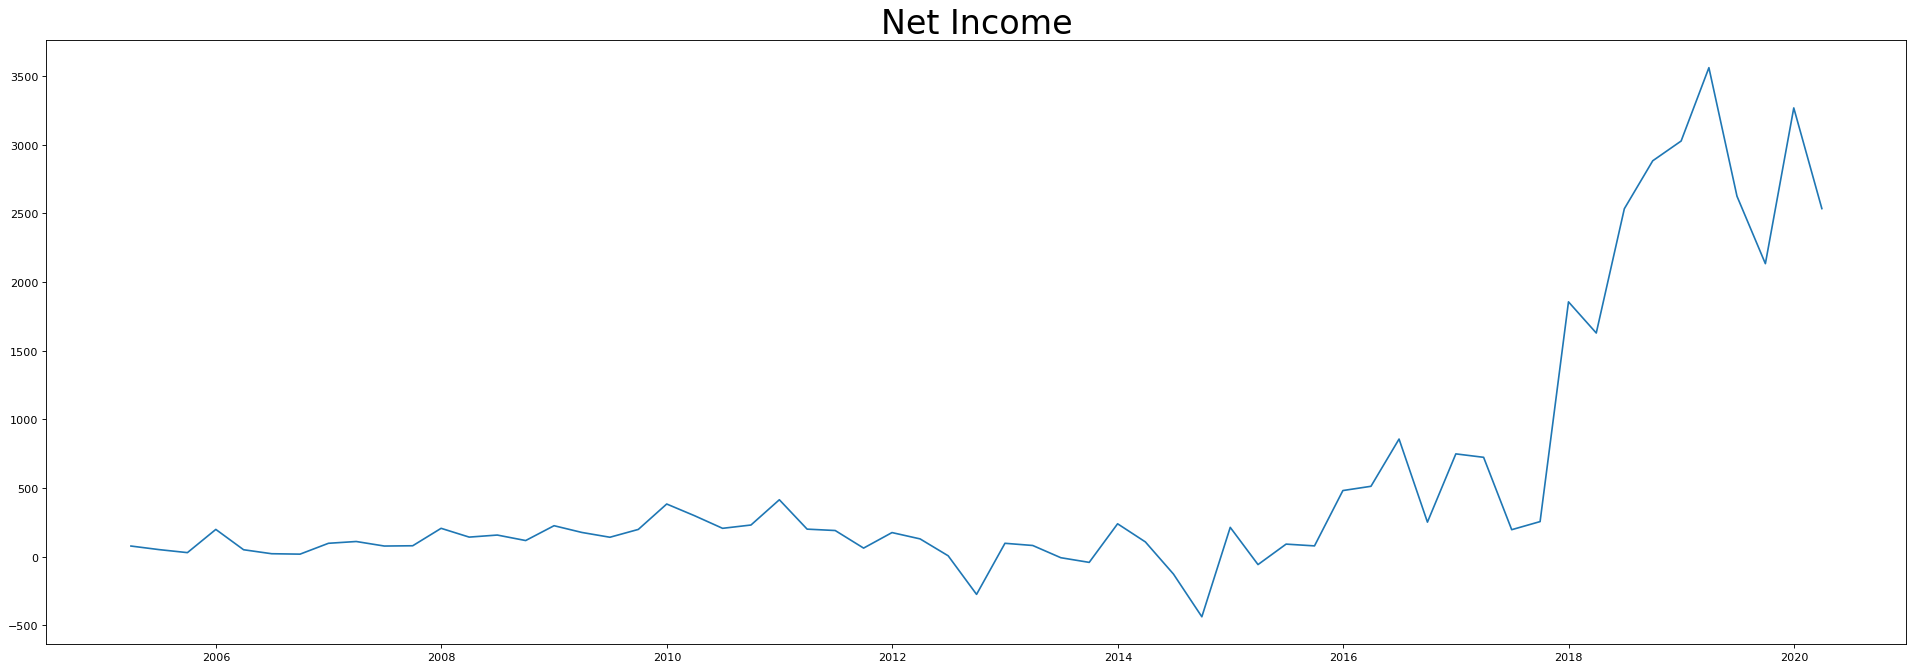

In [12]:
# For Net Income column

plt.figure(num= None, figsize=(30,10), dpi= 80, edgecolor = 'k')
plt.title('Net Income', fontsize = 30)
plt.plot(df['Net Income'])

## 2. Statistical tests


- H0 : Series is stationary  (Null Hypothesis) (Unit root is present)
- H1 : The series is not stationary (Alterante Hypothesis) (Unit root is not present)

### 2.a) KPSS test
- p value < significance level (alpha) (0.05)
        - The series is non-stationary
        
- p value > significance level (alpha) (0.05)
        - The series is stationary
        

In [13]:
from statsmodels.tsa.stattools import kpss

#### For Revenue column


In [14]:
stats, p, lags, critical_values = kpss(df['Revenue'], 'ct')

C:\Users\arun\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [15]:
stats, p, lags, critical_values

(0.1700516821083097,
 0.029956931576408573,
 11,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [16]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'critical values: {critical_values}')

Test Statistics: 0.1700516821083097
p-value: 0.029956931576408573
critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [17]:
if p< 0.05:
    print(" The series is non-stationary")
else:
        print(" The series is stationary")

 The series is non-stationary


#### for Net income column

In [18]:
stats, p, lags, critical_values = kpss(df['Net Income'], 'ct')

In [19]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'critical values: {critical_values}')

Test Statistics: 0.14817496842336633
p-value: 0.04818752631386138
critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


In [20]:
if p< 0.05:
    print(" The series is non-stationary")
else:
        print(" The series is stationary")

 The series is non-stationary


### 2.a) ADF test
- p value < significance level (alpha) (0.05) (unit root is present)
        - The series is stationary
        
- p value > significance level (alpha) (0.05)
        - The series is non- stationary (Unit root is not present)
        

In [21]:
from statsmodels.tsa.stattools import adfuller

#### For Revenue column

In [22]:
result = adfuller(df['Revenue'])

In [23]:
result

(-2.4448360381972414,
 0.1294794312183855,
 10,
 50,
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616},
 753.7964652720992)

In [24]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical values: {result[4]}')  # [2] and [3] are lag, we don't need that

Test Statistics: -2.4448360381972414
p-value: 0.1294794312183855
critical values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}


In [25]:
if result[1] > 0.05:
        print(" The series is non-stationary")
else:
        print(" The series is stationary")


 The series is non-stationary


# Converting a non-stationary series to a stationary series

## Method 1. Differencing and seasonal differencing

### Differencing
y(t) = y(t)-y(t-1)

In [28]:
df['Revenue_diff'] = df['Revenue']-df['Revenue'].shift(1)

In [29]:
df['Revenue_diff']

Quarter
2020-03-31        NaN
2019-12-31    11985.0
2019-09-30   -17456.0
2019-06-30    -6577.0
2019-03-31    -3704.0
               ...   
2006-03-31      140.0
2005-12-31      698.0
2005-09-30    -1119.0
2005-06-30     -105.0
2005-03-31      149.0
Name: Revenue_diff, Length: 61, dtype: float64

<AxesSubplot:xlabel='Quarter'>

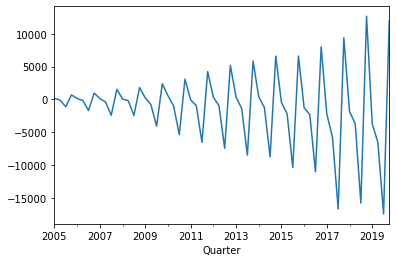

In [30]:
df['Revenue_diff'].dropna().plot()

In [37]:
result1 = adfuller(df['Revenue_diff'].dropna())

In [38]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical values: {result[4]}')  # [2] and [3] are lag, we don't need that

if result1[1] > 0.05:
        print(" The series is non-stationary")
else:
        print(" The series is stationary")


Test Statistics: -2.4448360381972414
p-value: 0.1294794312183855
critical values: {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
 The series is stationary


## perform for Net profit column

In [53]:
df['Net Income_diff'] = df['Net Income']-df['Net Income'].shift(1)
df['Net Income_diff']

Quarter
2020-03-31       NaN
2019-12-31     733.0
2019-09-30   -1134.0
2019-06-30     491.0
2019-03-31     936.0
               ...  
2006-03-31      29.0
2005-12-31     148.0
2005-09-30    -169.0
2005-06-30      22.0
2005-03-31      26.0
Name: Net Income_diff, Length: 61, dtype: float64

<AxesSubplot:xlabel='Quarter'>

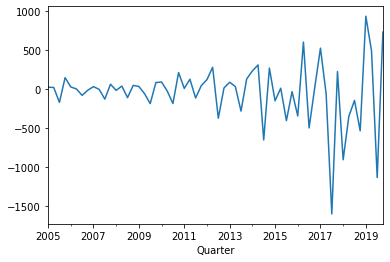

In [54]:
df['Net Income_diff'].dropna().plot()

In [57]:
result2 = adfuller(df['Net Income_diff'].dropna())

In [58]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'critical values: {result[4]}')  # [2] and [3] are lag, we don't need that

if result2[1] > 0.05:
        print(" The series is non-stationary")
else:
        print(" The series is stationary")


Test Statistics: -4.231655971721901
p-value: 0.0005821531764100457
critical values: {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
 The series is stationary


## differencing for Net income and varifying KPSS test

#### KPSS test

In [50]:
stats, p, lags, critical_values = kpss(df['Net Income'], 'ct')

In [59]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'critical values: {critical_values}')

if p < 0.05:
    print(" The series is non-stationary")
else:
        print(" The series is stationary")

Test Statistics: 0.14817496842336633
p-value: 0.04818752631386138
critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
 The series is non-stationary


In [60]:
#### either of one test will work; it's for only validation perpose

#### Seasonal differncing

In [61]:
## THe sales will be more on weekends as copare to weekdays
### Seasonal - monthwise
## weekly - 7

In [63]:
# seasonal differencing

#   y(t)= y(t)-y(t-n)

In [72]:
df['Revenue_dff_7'] = df['Revenue']-df['Revenue_diff'].shift(7)

In [73]:
df['Revenue_dff_7']

Quarter
2020-03-31       NaN
2019-12-31       NaN
2019-09-30       NaN
2019-06-30       NaN
2019-03-31       NaN
               ...  
2006-03-31     742.0
2005-12-31    5387.0
2005-09-30    2234.0
2005-06-30    1624.0
2005-03-31     931.0
Name: Revenue_dff_7, Length: 61, dtype: float64

<AxesSubplot:xlabel='Quarter'>

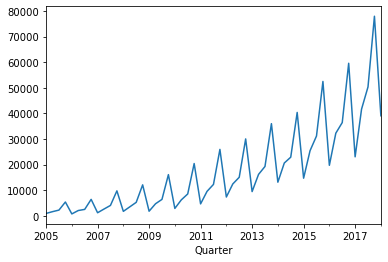

In [74]:
df['Revenue_dff_7'].dropna().plot()

# Method 2: Transformation

- log
- sqrt
- cubrt

In [78]:
# log transformation

df['Revenue_log'] = np.log(df['Revenue'])   # taking logarithm of the entire data in order to make it satationary

In [76]:
df['Revenue_log']

Quarter
2020-03-31    11.231252
2019-12-31    11.378674
2019-09-30    11.155979
2019-06-30    11.057282
2019-03-31    10.997087
                ...    
2006-03-31     7.731492
2005-12-31     7.998671
2005-09-30     7.527256
2005-06-30     7.469084
2005-03-31     7.550661
Name: Revenue_log, Length: 61, dtype: float64

<AxesSubplot:xlabel='Quarter'>

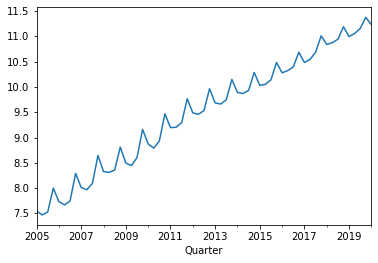

In [77]:
df['Revenue_log'].dropna().plot()

In [79]:
# sqrt transformation

df['Revenue_sqrt'] = np.sqrt(df['Revenue'])   # taking sqrt of the entire data in order to make it satationary

In [80]:
df['Revenue_sqrt']

Quarter
2020-03-31    274.685274
2019-12-31    295.697481
2019-09-30    264.539222
2019-06-30    251.801509
2019-03-31    244.335834
                 ...    
2006-03-31     47.738873
2005-12-31     54.561891
2005-09-30     43.104524
2005-06-30     41.868843
2005-03-31     43.611925
Name: Revenue_sqrt, Length: 61, dtype: float64

<AxesSubplot:xlabel='Quarter'>

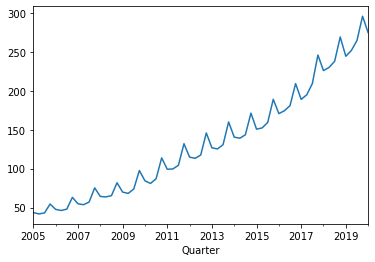

In [81]:
df['Revenue_sqrt'].dropna().plot()

In [82]:
# qbrt transformation

df['Revenue_qbrt'] = np.sqrt(df['Revenue'])   # taking qbrt of the entire data in order to make it satationary

In [83]:
df['Revenue_qbrt']

Quarter
2020-03-31    274.685274
2019-12-31    295.697481
2019-09-30    264.539222
2019-06-30    251.801509
2019-03-31    244.335834
                 ...    
2006-03-31     47.738873
2005-12-31     54.561891
2005-09-30     43.104524
2005-06-30     41.868843
2005-03-31     43.611925
Name: Revenue_qbrt, Length: 61, dtype: float64

<AxesSubplot:xlabel='Quarter'>

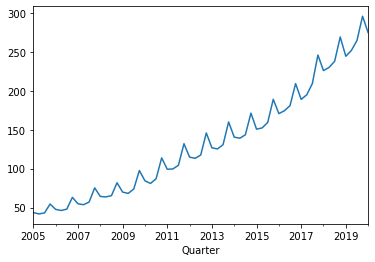

In [84]:
df['Revenue_qbrt'].dropna().plot()

# Method 3: Rollong mean

In [86]:
df['Revenue_RM'] = df['Revenue'].rolling(window= 20).mean()

<AxesSubplot:xlabel='Quarter'>

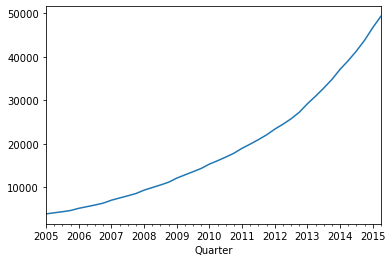

In [87]:
df['Revenue_RM'].dropna().plot()

### When more window - more observation are taken into consideration and the fluctuation become less and the data is more smoother

- Stationarity 
- how to detect stationarity 
- visualization
- Statistical methods- KPSS & ADS
- How to convert non stationary ts to stationary ts